<a href="https://colab.research.google.com/github/fufi-tuti/dataMiningprj/blob/main/K-means%20Analysis%20and%20Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Part 1 - By Person 3 (K-Means Analysis and Evaluation)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [5]:
# 1. Load the dataset
df = pd.read_csv("final_selected_data.csv")

# 2. Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 3. Try different values for K
k_values = range(2, 7)  # من 2 إلى 6
wcss = []  # Total Within-Cluster Sum of Squares
silhouette_scores = []

# 4. Apply K-Means for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
# 5. Save evaluation metrics
    wcss.append(kmeans.inertia_)  # Elbow Method
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# 6. Print results for Person 4 to use
print("K-values:", list(k_values))
print("WCSS values:", wcss)
print("Silhouette Scores:", silhouette_scores)

K-values: [2, 3, 4, 5, 6]
WCSS values: [43253.64113728645, 32648.540186466904, 20419.977755863652, 13998.439162240602, 8081.055899107501]
Silhouette Scores: [np.float64(0.489618013385644), np.float64(0.47351355306207377), np.float64(0.5971719597245527), np.float64(0.6542000975513658), np.float64(0.7298067394818004)]


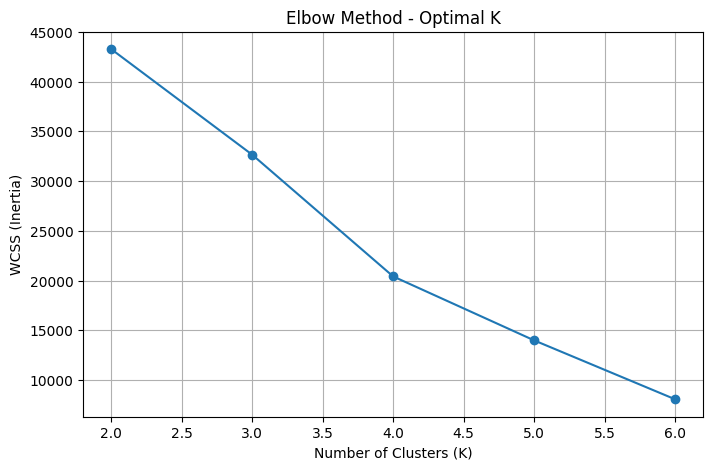

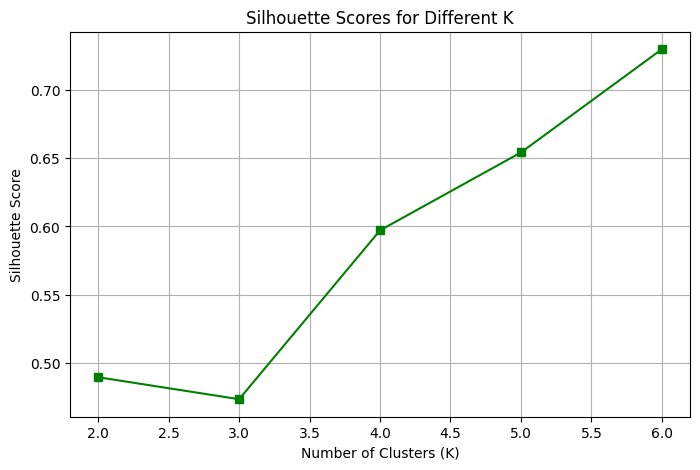

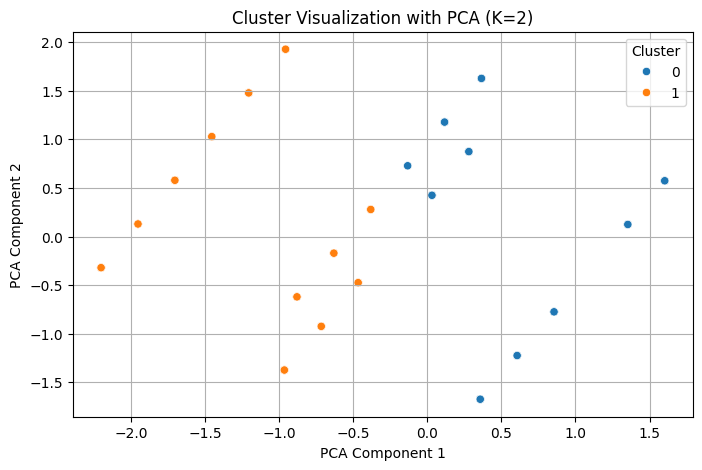

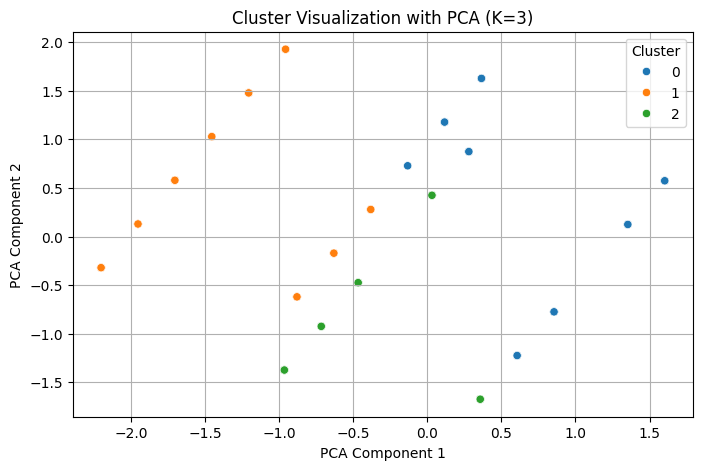

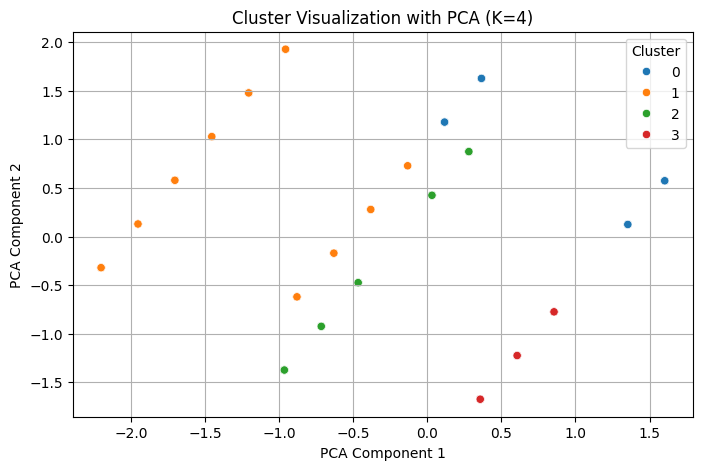

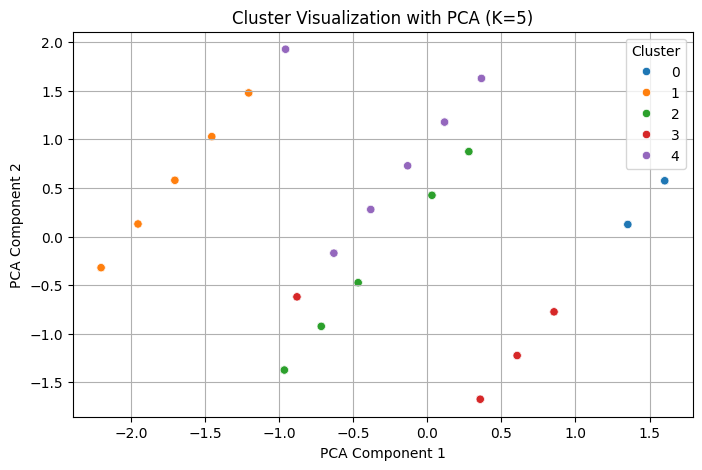

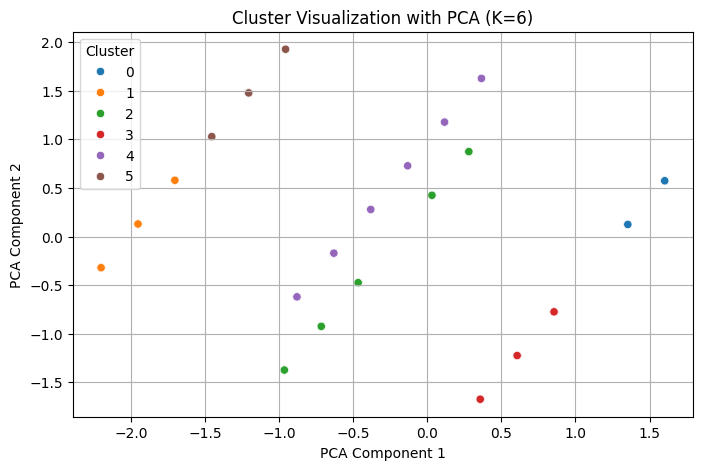


--- Comparison Summary ---
Best K by Silhouette Score is K = 6 with score = 0.730

Recommendation: Based on Elbow and Silhouette, use K = 6


In [6]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='s', color='green')
plt.title('Silhouette Scores for Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=cluster_labels, palette='tab10')
    plt.title(f'Cluster Visualization with PCA (K={k})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()

print("\n--- Comparison Summary ---")
best_silhouette = max(silhouette_scores)
best_k = k_values[silhouette_scores.index(best_silhouette)]
print(f"Best K by Silhouette Score is K = {best_k} with score = {best_silhouette:.3f}")

print("\nRecommendation: Based on Elbow and Silhouette, use K =", best_k)

We applied K-means with K from 2 to 6.
The Elbow method showed a clear bend at K = 2, and the Silhouette score was highest also at K = 2, meaning the clusters were well separated.
PCA visualization confirmed that K = 2 gave the clearest cluster separation